In [413]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Flatten,Dense,Dropout,Conv2D,MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator, load_img
import os
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [363]:
os.listdir('Brain-Tumor-Classification\Training')

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

In [364]:
train_dir='Brain-Tumour-Classification/Training'
test_dir='Brain-Tumour-Classification/Testing'

In [365]:
glioma ='Brain-Tumor-Classification/Training/glioma_tumor'
meningioma ='Brain-Tumor-Classification/Training/meningioma_tumor'
no='Brain-Tumor-Classification/Training/no_tumor'
pituitary='Brain-Tumor-Classification/Training/pituitary_tumor'

In [366]:
import random

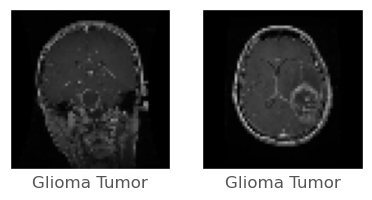

In [367]:
plt.figure(figsize=(12,6))
gli_samp = random.sample(os.listdir(glioma),2)

for i,image in enumerate(gli_samp):
    path = os.path.join(glioma,image)
    img = load_img(path,target_size=(64,64))
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.xlabel("Glioma Tumor")
    plt.xticks([])
    plt.yticks([])

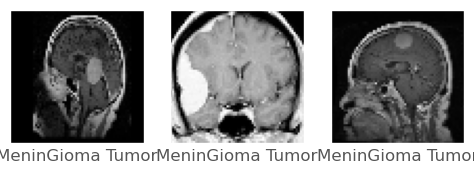

In [368]:
plt.figure(figsize=(10,5))
men_samp= random.sample(os.listdir(meningioma),3)

for i,image in enumerate(men_samp):
    path = os.path.join(meningioma,image)
    img = load_img(path,target_size=(64,64))
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.xlabel("MeninGioma Tumor")
    plt.xticks([])
    plt.yticks([])

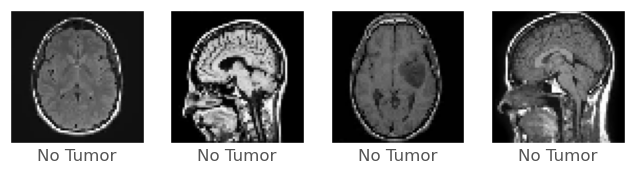

In [369]:
plt.figure(figsize=(10,5))
no= random.sample(os.listdir(no),4)

for i,image in enumerate(no):
    path = os.path.join(no_tumor,image)
    img = load_img(path,target_size=(64,64))
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.xlabel("No Tumor")
    plt.xticks([])
    plt.yticks([])

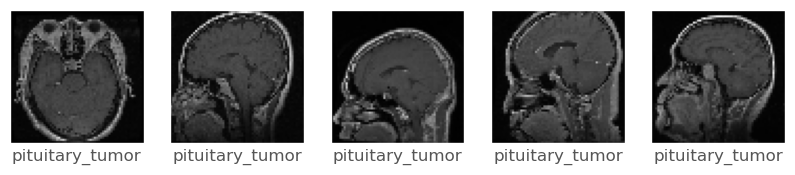

In [370]:
plt.figure(figsize=(10,5))
pituitary_tumor= random.sample(os.listdir(pituitary),5)

for i,image in enumerate(pituitary_tumor):
    path = os.path.join(pituitary,image)
    img = load_img(path,target_size=(64,64))
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.xlabel("pituitary_tumor")
    plt.xticks([])
    plt.yticks([])

In [397]:
train_dir='Brain-Tumour-Classification/Training'
test_dir='Brain-Tumour-Classification/Testing'
train_glioma ='Brain-Tumor-Classification/Training/glioma_tumor'
train_meningioma ='Brain-Tumor-Classification/Training/meningioma_tumor'
train_no='Brain-Tumor-Classification/Training/no_tumor'
train_pituitary='Brain-Tumor-Classification/Training/pituitary_tumor'

In [372]:
xtrain=[]
ytrain=[]

In [373]:
from tqdm import tqdm

In [374]:
for i in tqdm(os.listdir(train_glioma)):
    path = os.path.join(train_glioma,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(128,128))
    xtrain.append(img)
    ytrain.append('Glioma')

100%|███████████████████████████████████████████████████████████████████████████████| 826/826 [00:02<00:00, 300.22it/s]


In [375]:
for i in tqdm(os.listdir(train_meningioma)):
    path=os.path.join(train_meningioma,i)
    img=cv2.imread(path)
    img=cv2.resize(img,(128,128))
    xtrain.append(img)
    ytrain.append('Meningioma')

100%|███████████████████████████████████████████████████████████████████████████████| 822/822 [00:02<00:00, 321.39it/s]


In [376]:
for i in tqdm(os.listdir(train_no)):
    path=os.path.join(train_no,i)
    img=cv2.imread(path)
    img=cv2.resize(img,(128,128))
    xtrain.append(img)
    ytrain.append('No Tumor')

100%|███████████████████████████████████████████████████████████████████████████████| 395/395 [00:01<00:00, 379.82it/s]


In [377]:
for i in tqdm(os.listdir(train_pituitary)):
    path=os.path.join(train_pituitary,i)
    img=cv2.imread(path)
    img=cv2.resize(img,(128,128))
    xtrain.append(img)
    ytrain.append('Pituitary')

100%|███████████████████████████████████████████████████████████████████████████████| 827/827 [00:02<00:00, 294.10it/s]


In [378]:
train_dir='Brain-Tumour-Classification/Training'
test_dir='Brain-Tumour-Classification/Testing'
test_glioma ='Brain-Tumor-Classification/Testing/glioma_tumor'
test_meningioma ='Brain-Tumor-Classification\Testing\meningioma_tumor'
test_no_tumor='Brain-Tumor-Classification/Testing/no_tumor'
test_pituitary='Brain-Tumor-Classification/Testing/pituitary_tumor'

In [379]:
xtest=[]
ytest=[]

In [380]:
for i in tqdm(os.listdir(test_glioma)):
    path = os.path.join(test_glioma,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(128,128))
    xtest.append(img)
    ytest.append('Glioma')

100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 506.45it/s]


In [381]:
for i in tqdm(os.listdir(test_meningioma)):
    path = os.path.join(test_meningioma,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(128,128))
    xtest.append(img)
    ytest.append('Meningioma')

100%|███████████████████████████████████████████████████████████████████████████████| 115/115 [00:00<00:00, 676.98it/s]


In [382]:
for i in tqdm(os.listdir(test_no_tumor)):
    path = os.path.join(test_no_tumor,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(128,128))
    xtest.append(img)
    ytest.append('No_Tumour') 

100%|██████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 1202.26it/s]


In [383]:
for i in tqdm(os.listdir(test_pituitary)):
    path = os.path.join(test_pituitary,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(128,128))
    xtest.append(img)
    ytest.append('Pituitary')    

100%|█████████████████████████████████████████████████████████████████████████████████| 74/74 [00:00<00:00, 179.43it/s]


In [384]:
xtrain=np.array(xtrain)
ytrain=np.array(ytrain)
xtest=np.array(xtest)
ytest=np.array(ytest)

In [385]:
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((2870, 128, 128, 3), (2870,), (394, 128, 128, 3), (394,))

In [386]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
LE = LabelEncoder()
ytrain = LE.fit_transform(ytrain)
ytest = LE.fit_transform(ytest)

In [387]:
ytrain

array([0, 0, 0, ..., 3, 3, 3], dtype=int64)

In [388]:
ytest

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [389]:
ytrain.shape

(2870,)

In [390]:
ytest.shape

(394,)

In [391]:
ytest = to_categorical(ytest)
ytest.shape

(394, 4)

In [392]:
ytrain = to_categorical(ytrain)
ytrain.shape

(2870, 4)

In [393]:
img_size=128

In [394]:
train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=30,
height_shift_range=0.2,
zoom_range = 0.3,
horizontal_flip=True
)

test_datagen = ImageDataGenerator(
rescale=1./255
)

In [399]:
train_dir='Brain-Tumor-Classification\Training'
test_dir='Brain-Tumor-Classification\Testing'

In [400]:
train_gen = train_datagen.flow_from_directory(directory = train_dir,
target_size=(img_size,img_size),
class_mode ='categorical',
batch_size=32
)

test_gen = test_datagen.flow_from_directory(directory = test_dir,
target_size=(img_size,img_size),
class_mode ='categorical',
batch_size=32
)

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [403]:
model=Sequential()

In [408]:
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(128,128,3)))

In [415]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [416]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

In [417]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [418]:
model.add(Flatten())

In [441]:
model.add(Dense(64, activation='relu'))

In [442]:
model.add(Dropout(0.4))

In [443]:
model.add(Dense(128, activation='relu'))

In [444]:
model.add(Dropout(0.4))

In [445]:
model.add(Dense(4, activation='softmax'))

In [450]:
from keras.optimizers import Adam

optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])


In [ ]:
history = model.fit(xtrain,ytrain,epochs=5,batch_size=40,validation_data = (xtest,ytest),verbose=1)

Epoch 1/5
72/72 [==============================] - 145s 2s/step - loss: 0.9435 - accuracy: 0.5415 - val_loss: 1.8006 - val_accuracy: 0.2335
Epoch 2/5
72/72 [==============================] - 150s 2s/step - loss: 0.9111 - accuracy: 0.5606 - val_loss: 1.8413 - val_accuracy: 0.2259
Epoch 3/5
12/72 [====>.........................] - ETA: 1:48 - loss: 0.9463 - accuracy: 0.5021

In [ ]:
model.evaluate(xtest,ytest)

In [ ]:
ypred= model.predict(xtest)
ypred = np.argmax(ypred,axis=1)